#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Dataset

In [2]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Datasets\bengaluru_house_prices.csv")

In [3]:
df.price = df.price*1000

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39070.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120000.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62000.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95000.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51000.0


### Exploratory Data Analysis and Data Cleaning

In [5]:
df.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [6]:
df["area_type"].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df["availability"].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [8]:
df["location"].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [9]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df["balcony"].unique()

array([ 1.,  3., nan,  2.,  0.])

#### Dropping Unwanted Columns to keep the Dataset simple

In [11]:
df = df.drop(["availability", "society"], axis=1)

In [12]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39070.0
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120000.0
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62000.0
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95000.0
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51000.0


#### Handling Null Values

In [13]:
df.isna().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [16]:
df.shape

(12710, 7)

In [17]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

#### The size column has some values in "BHK" and others "Bedroom" which we have to handle for them to be the same.

In [18]:
df["size"] = df["size"].apply(lambda x: int(x.split(" ")[0]))

In [19]:
df.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39070.0
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120000.0
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62000.0
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95000.0
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51000.0


In [20]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### We have values in the total_sqft column that we have to handle. Some of the values are not float so we have to convert all of them to number

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df[~df["total_sqft"].apply(is_float)].head(20)

,area_type,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,Yelahanka,4,2100 - 2850,4.0,0.0,186000.0
122,Super built-up Area,Hebbal,4,3067 - 8156,4.0,0.0,477000.0
137,Super built-up Area,8th Phase JP Nagar,2,1042 - 1105,2.0,0.0,54005.0
165,Super built-up Area,Sarjapur,2,1145 - 1340,2.0,0.0,43490.0
188,Super built-up Area,KR Puram,2,1015 - 1540,2.0,0.0,56800.0
410,Super built-up Area,Kengeri,1,34.46Sq. Meter,1.0,0.0,18500.0
549,Super built-up Area,Hennur Road,2,1195 - 1440,2.0,0.0,63770.0
661,Super built-up Area,Yelahanka,2,1120 - 1145,2.0,0.0,48130.0
672,Built-up Area,Bettahalsoor,4,3090 - 5002,4.0,0.0,445000.0
772,Super built-up Area,Banashankari Stage VI,2,1160 - 1195,2.0,0.0,59935.0


In [23]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    else:
        try:
            return float(x)
        except:
            return None

In [24]:
df["total_sqft"] = df["total_sqft"].apply(convert_sqft_to_num)

In [25]:
df.shape

(12710, 7)

In [26]:
df.iloc[391:394]

,area_type,location,size,total_sqft,bath,balcony,price
409,Plot Area,Sultan Palaya,2,550.0,1.0,1.0,62000.0
410,Super built-up Area,Kengeri,1,NaN,1.0,0.0,18500.0
412,Super built-up Area,Kengeri,2,750.0,2.0,1.0,38000.0


#### The total_sqft column values that were not floats and also not in range but in different units has been changed to NaN so we have to handle that

In [27]:
df.isna().sum()

area_type      0
location       0
size           0
total_sqft    42
bath           0
balcony        0
price          0
dtype: int64

#### We have only 42 NaNs so we can drop them.

In [28]:
df.dropna(inplace = True)

In [29]:
df.shape

(12668, 7)

In [30]:
df.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [31]:
new_df = df.copy()

### Feature Engineering

#### Creating a new column called price_per_sqft

In [32]:
new_df["price_per_sqft"] = (df["price"]/df["total_sqft"])*12 ##From dollars to cedis

In [33]:
new_df.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39070.0,443.977273
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120000.0,553.846154
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62000.0,516.666667
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95000.0,749.506903
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51000.0,510.000000


#### Changing column name from "size" to "no_of_bedrooms"

In [34]:
new_df["no_of_bedrooms"] = new_df["size"]

In [35]:
new_df = new_df.drop("size", axis=1)

In [36]:
new_df.head()

,area_type,location,total_sqft,bath,balcony,price,price_per_sqft,no_of_bedrooms
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39070.0,443.977273,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120000.0,553.846154,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62000.0,516.666667,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95000.0,749.506903,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51000.0,510.000000,2


#### Some of the locations have less than 10 appearances or rows so we can group those columns to keep the location column simple and to avoid dimensional curse.

In [37]:
len(new_df["location"].unique())

1259

In [38]:
new_df.location = new_df["location"].apply(lambda x: x.strip())

In [39]:
location_stats = new_df.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stats

location
Whitefield                        514
Sarjapur  Road                    372
Electronic City                   302
Kanakpura Road                    259
Thanisandra                       233
                                 ... 
2nd phase jp nagar, jp nagar        1
3rd Block HBR Layout                1
KPC Layout                          1
asha township, off hennur road      1
Vittal Mallya Road                  1
Name: location, Length: 1248, dtype: int64

In [40]:
len(location_stats[location_stats <= 10])

1013

In [41]:
less_than_10 = location_stats[location_stats <= 10]

In [42]:
new_df["location"] = new_df["location"].apply(lambda x: "others" if x in less_than_10 else x)

In [43]:
len(new_df["location"].unique()) 

236

In [44]:
new_df.head(20)

,area_type,location,total_sqft,bath,balcony,price,price_per_sqft,no_of_bedrooms
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39070.0,443.977273,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120000.0,553.846154,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62000.0,516.666667,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95000.0,749.506903,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51000.0,510.000000,2
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38000.0,389.743590,2
8,Super built-up Area,Marathahalli,1310.0,3.0,1.0,63250.0,579.389313,3
10,Super built-up Area,Whitefield,1800.0,2.0,2.0,70000.0,466.666667,3
11,Plot Area,Whitefield,2785.0,5.0,3.0,295000.0,1271.095153,4
12,Super built-up Area,7th Phase JP Nagar,1000.0,2.0,1.0,38000.0,456.000000,2


### Outlier Removal

#### Using a threshold of 300sqft or more for a single bedroom

In [45]:
new_df[new_df["total_sqft"]/new_df["no_of_bedrooms"] < 300]

,area_type,location,total_sqft,bath,balcony,price,price_per_sqft,no_of_bedrooms
58,Plot Area,Murugeshpalya,1407.0,4.0,1.0,150000.0,1279.317697,6
68,Plot Area,Devarachikkanahalli,1350.0,7.0,0.0,85000.0,755.555556,8
70,Plot Area,others,500.0,3.0,2.0,100000.0,2400.000000,3
78,Built-up Area,Kaval Byrasandra,460.0,1.0,0.0,22000.0,573.913043,2
89,Plot Area,Rajaji Nagar,710.0,6.0,3.0,160000.0,2704.225352,6
...,...,...,...,...,...,...,...,...
13219,Plot Area,Laggere,1590.0,9.0,3.0,132000.0,996.226415,7
13221,Plot Area,others,1178.0,9.0,1.0,75000.0,764.006791,9
13281,Plot Area,Margondanahalli,1375.0,5.0,1.0,125000.0,1090.909091,5
13303,Plot Area,Vidyaranyapura,774.0,5.0,3.0,70000.0,1085.271318,5


In [46]:
new_df = new_df[~(new_df["total_sqft"]/new_df["no_of_bedrooms"] < 300)]
new_df.shape

(12013, 8)

#### Removing outliers using standard deiviations of the "price_per_sqft"

In [47]:
new_df["price_per_sqft"].describe()

count    12013.000000
mean       744.729882
std        478.262257
min         32.139578
25%        503.923567
50%        630.303030
75%        818.823529
max      21176.470588
Name: price_per_sqft, dtype: float64

In [48]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for k, subdf in df.groupby("location"):
        m = np.mean(subdf["price_per_sqft"])
        st = np.std(subdf["price_per_sqft"])
        reduced_df = subdf[(subdf["price_per_sqft"] > (m-st)) & (subdf["price_per_sqft"] < (m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
new_df = remove_pps_outliers(new_df)
new_df.shape

(9852, 8)

Text(0, 0.5, 'count')

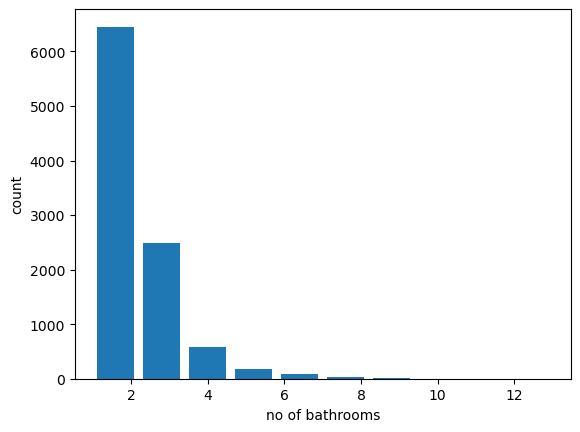

In [49]:
plt.hist(new_df["bath"], rwidth=0.8)
plt.xlabel("no of bathrooms")
plt.ylabel("count")

#### Majority of the houses have 2 bedrooms

Text(0, 0.5, 'count')

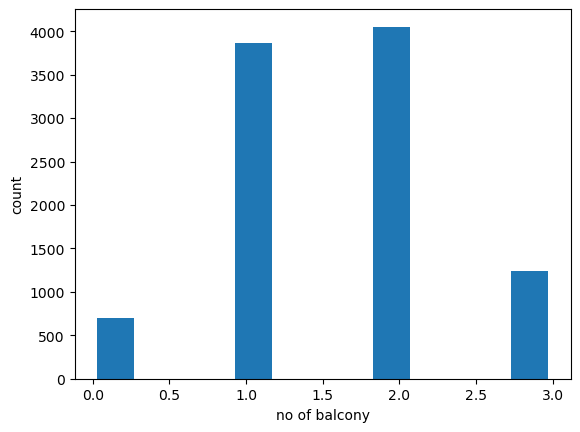

In [51]:
plt.hist(new_df["balcony"], rwidth=0.8)
plt.xlabel("no of balcony")
plt.ylabel("count")

In [52]:
new_df["balcony"].unique()

array([1., 2., 3., 0.])

Text(0.5, 1.0, 'Relationship between number of balconies and the price of a house')

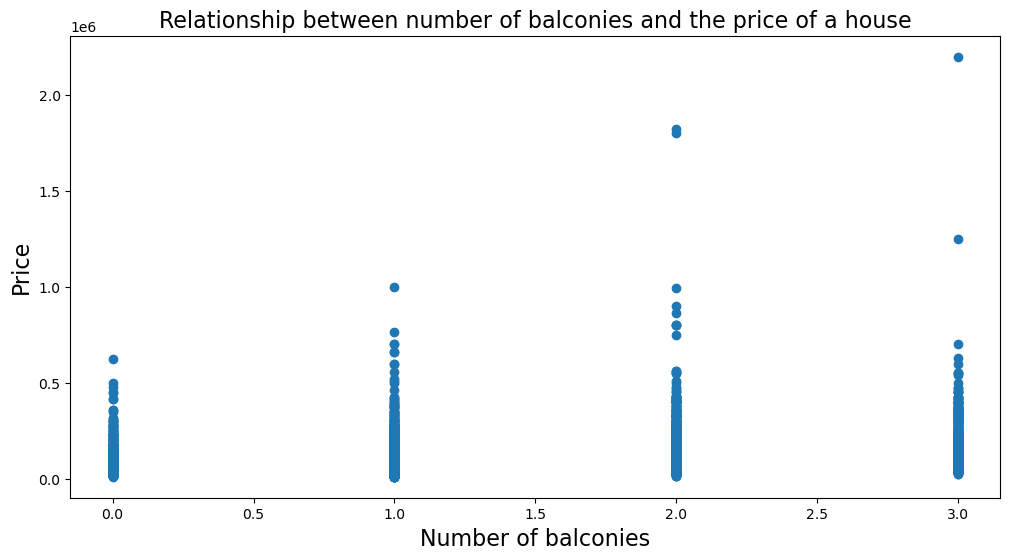

In [59]:
plt.figure(figsize = (12, 6))
plt.scatter(new_df[["balcony"]], new_df["price"])
plt.xlabel("Number of balconies", fontsize = 16)
plt.ylabel("Price", fontsize = 16)
plt.title("Relationship between number of balconies and the price of a house", fontsize = 16)

Text(0.5, 1.0, 'Relationship between number of balconies and the price of a house')

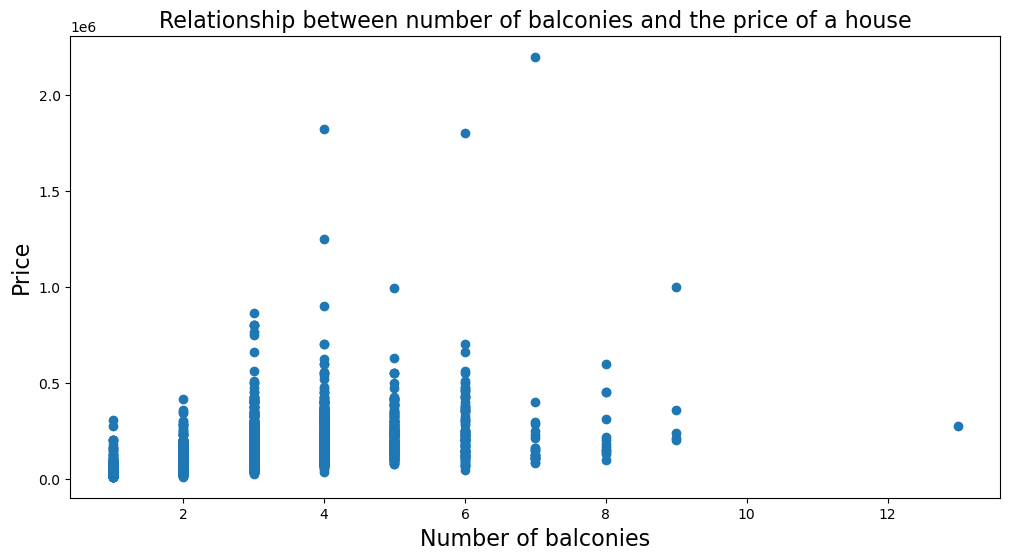

In [60]:
plt.figure(figsize = (12, 6))
plt.scatter(new_df[["bath"]], new_df["price"])
plt.xlabel("Number of balconies", fontsize = 16)
plt.ylabel("Price", fontsize = 16)
plt.title("Relationship between number of balconies and the price of a house", fontsize = 16)

#### We can remove houses that has number of baths more the number of rooms.

In [50]:
new_df[new_df["bath"] > new_df["no_of_bedrooms"]]

,area_type,location,total_sqft,bath,balcony,price,price_per_sqft,no_of_bedrooms
9,Super built-up Area,1st Phase JP Nagar,2065.0,4.0,1.0,210000.0,1220.338983,3
14,Built-up Area,1st Phase JP Nagar,840.0,2.0,2.0,50000.0,714.285714,1
22,Super built-up Area,1st Phase JP Nagar,2615.0,5.0,3.0,222000.0,1018.738050,4
33,Plot Area,2nd Stage Nagarbhavi,3000.0,8.0,3.0,451000.0,1804.000000,6
34,Plot Area,2nd Stage Nagarbhavi,2400.0,8.0,3.0,450000.0,2250.000000,6
...,...,...,...,...,...,...,...,...
9715,Built-up Area,others,1300.0,3.0,1.0,65000.0,600.000000,2
9786,Super built-up Area,others,600.0,3.0,2.0,72000.0,1440.000000,2
9805,Super built-up Area,others,2710.0,5.0,3.0,142000.0,628.782288,4
9815,Super built-up Area,others,6652.0,6.0,1.0,660000.0,1190.619363,4


In [51]:
new_df = new_df[~(new_df["bath"] > new_df["no_of_bedrooms"])]
new_df.shape

(9347, 8)

### Model Building

In [52]:
new_df.head()

,area_type,location,total_sqft,bath,balcony,price,price_per_sqft,no_of_bedrooms
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428000.0,1802.105263,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194000.0,1428.220859,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235000.0,1504.000000,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,0.0,130000.0,1300.000000,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,2.0,148000.0,1438.056680,2


In [53]:
new_df["location"] = new_df["location"].apply(lambda x: x.strip())

#### Dropping unwanted columns eg. We can drop the "area_type" and use the actual location for our prediction

In [54]:
new_df = new_df.drop(["area_type", "balcony", "price_per_sqft"], axis=1)

#### Converting strings columns to numbers using one hot encoding

In [55]:
dummies = pd.get_dummies(new_df["location"], dtype = int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
print(dummies.columns)

Index(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar', '6th Phase JP Nagar', '7th Phase JP Nagar',
       '8th Phase JP Nagar', '9th Phase JP Nagar', 'AECS Layout',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'others'],
      dtype='object', length=236)


#### We drop one dummy column to avoid dummy variable trap

In [57]:
dummies = dummies.drop('others', axis=1)

In [58]:
new_df = pd.concat([new_df, dummies], axis=1)

In [59]:
new_df.drop("location", axis = 1, inplace=True)

In [60]:
new_df.head()

,total_sqft,bath,price,no_of_bedrooms,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428000.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194000.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235000.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130000.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148000.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
new_df.shape

(9347, 239)

In [62]:
X = new_df.drop(["price"], axis=1)
X.shape

(9347, 238)

In [63]:
y = new_df["price"]
y.shape

(9347,)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

In [66]:
X_train.shape

(7477, 238)

In [67]:
X_test.shape

(1870, 238)

#### Linear Regression Model

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
lr_clf = LinearRegression()

In [70]:
model1 = lr_clf.fit(X_train, y_train)

In [71]:
model1.score(X_test, y_test)

0.800743672131514

#### Lasso Regressor

In [72]:
from sklearn.linear_model import Lasso

lasso = Lasso()
model2 = lasso.fit(X_train, y_train)
model2.score(X_test, y_test)

0.8006100601141954

#### Decision Tree Regressor

In [73]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
model3 = dtr.fit(X_train, y_train)
model3.score(X_test, y_test)

0.6327167420762547

#### Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [75]:
cross_val_score(lr_clf, X, y, cv = cv).mean()

np.float64(0.7902333300982448)

In [76]:
cross_val_score(lasso, X, y, cv = cv).mean()

np.float64(0.7903017070294351)

In [77]:
cross_val_score(dtr, X, y, cv = cv).mean()

np.float64(0.6832611178326132)

### Using GridSearch to find which model performs best and with what parameters

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
def best_model(X, y):
    models = {
        'lr_clf': {
            'model': LinearRegression(),
            'parameters': {
                'fit_intercept': [True, False],
                'copy_X': [True, False],
                'positive': [True, False],
            }
        },
        'lasso': {
                'model': Lasso(),
                'parameters': {
                    'alpha': [1,2,3,4,5],
                    'selection': ['random', 'cyclic'],
                    'copy_X': [True, False]
                }
        },
         'dtr': {
                'model': DecisionTreeRegressor(),
                'parameters': {
                    'criterion' : ["squared_error", "friedman_mse", "absolute_error", "poisson"],
                    'splitter': ['best', 'random'],
                    }
                }
    }
    scores = []
    cv  = ShuffleSplit(n_splits = 5, test_size = 0.20, random_state = False)


    for algorithm_name, config in models.items():
        gs = GridSearchCV(config['model'], config['parameters'], cv = cv, return_train_score = False)
        gs.fit(X, y)
        scores.append({
        'model': algorithm_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
        })
    return pd.DataFrame(scores)

In [80]:
best_model(X, y)

,model,best_score,best_params
0,lr_clf,0.790233,"{'copy_X': True, 'fit_intercept': True, 'posit..."
1,lasso,0.790302,"{'alpha': 1, 'copy_X': False, 'selection': 'ra..."
2,dtr,0.687226,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


#### Lasso Regression Performs best amongst all the models

In [81]:
X.columns

Index(['total_sqft', 'bath', 'no_of_bedrooms', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=238)

In [82]:
def predict_price( location, total_sqft, bath, no_of_bedrooms):

    location_index = np.where(X.columns == location)[0][0]
    
    x = pd.DataFrame([np.zeros(len(X.columns))], columns=X.columns)
    x[0] = total_sqft
    x[1] = bath
    x[2] = no_of_bedrooms
    if location_index >= 1:
        x[location_index] = 1
    return lasso.predict([x])[0]

In [83]:
predict_price("1st Phase JP Nagar", 1000.0 , 2.0, 	2.0)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


np.float64(88097.51199247965)

In [84]:
import pickle
with open('home_prices_prediction_model.pickle', 'wb') as f:
    pickle.dump(lasso, f)

In [85]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open("columns.json", "w") as f:
    f.write(json.dumps(columns))